In [12]:
from pymongo import MongoClient
import pandas as pd
import json
import networkx as nx
import sys
from bson.objectid import ObjectId

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
client = MongoClient("mongodb://localhost:27017/");
print("Connection Successful")
db = client.DATABASETEST
col = db.articles

Connection Successful


In [4]:
G = nx.Graph()

In [7]:
nbCollab = 0

tabStructName = col["labstructName_s"]
for x in col.find({ "labStructName_s": { '$exists': 1 }, "labStructAddress_s": {'$exists': 1} }):
    tabLab = x["labStructName_s"]
    tabAddress = x["labStructAddress_s"]
    tabId = x["_id"]
    taille = len(tabLab)
    if taille > 1:
        for i in range(0,taille-1):
            for j in range(i+1,taille):
                if tabLab[i] != tabLab[j] and not G.has_edge(tabLab[i],tabLab[j]) and not G.has_edge(tabLab[j],tabLab[i]):
                    try:
                        b1 = tabAddress[i].find('Lyon')
                        b2 = tabAddress[i].find('Villeurbanne')
                        b3 = tabAddress[j].find('Lyon')
                        b4 = tabAddress[j].find('Villeurbanne')
                        if (b1 != -1 or b2 != -1) and (b3 != -1 or b4 != -1):
                            G.add_edge(tabLab[i], tabLab[j])
                    except IndexError:
                        col.delete_one({'_id': ObjectId(tabId)})
                        

In [8]:
nx.number_of_edges(G)

107

In [9]:
G.edges

EdgeView([("Laboratoire d'économie des transports", 'Laboratoire de Physique de la Matière Condensée et Nanostructures'), ("Laboratoire d'économie des transports", "Laboratoire de Physique de l'ENS Lyon"), ('Laboratoire de Physique de la Matière Condensée et Nanostructures', "Laboratoire de Physique de l'ENS Lyon"), ("Laboratoire de Physique de l'ENS Lyon", 'Laboratoire de Géologie de Lyon - Terre, Planètes, Environnement [Lyon]'), ("Laboratoire de Physique de l'ENS Lyon", "Laboratoire d'InfoRmatique en Image et Systèmes d'information"), ("Laboratoire de Physique de l'ENS Lyon", 'Parcours santé systémique'), ('Laboratoire de Productique et Informatique des systèmes manufacturiers', "Laboratoire d'Informatique pour l'Entreprise et les Systèmes de Production"), ('Laboratoire de Productique et Informatique des systèmes manufacturiers', 'Institut de Physique Nucléaire de Lyon'), ("Laboratoire d'Informatique pour l'Entreprise et les Systèmes de Production", "Laboratoire d'InfoRmatique en Im

In [66]:
G.clear()

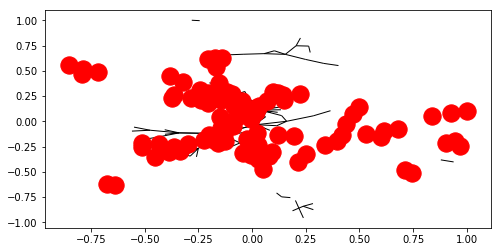

In [31]:
f, ax = plt.subplots(figsize=(8,4))
ax=ax
nx.draw_networkx_edges(G, with_labels=False,pos=nx.spring_layout(G)) #,arrows=True, with_labels=False)
nx.draw_networkx_nodes(G, with_labels=False,pos=nx.spring_layout(G))
#limits=plt.axis('off')